Import necessary libraries

In [1]:
from copy import deepcopy
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt
!pip install rasterio==1.1.8
import rasterio as rio


  error: subprocess-exited-with-error
  
  Getting requirements to build wheel did not run successfully.
  exit code: 1
  
  [2 lines of output]
  INFO:root:Building on Windows requires extra options to setup.py to locate needed GDAL files. More information is available in the README.
  ERROR: A GDAL API version must be specified. Provide a path to gdal-config using a GDAL_CONFIG environment variable or use a GDAL_VERSION environment variable.
  [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
error: subprocess-exited-with-error

Getting requirements to build wheel did not run successfully.
exit code: 1

See above for output.

note: This error originates from a subprocess, and is likely not a problem with pip.


     ---------------------------------------- 2.1/2.1 MB 1.6 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: still running...
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'error'


Drag the image **S2image.tif** in the **sample_data** folder

In [2]:
src=rio.open('./data/S2image.tif')
im=src.read()

C:\Users\ariol\Documents\documents\CDE\UBS\JupyterEnvironment\lib\site-packages\rasterio\__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


Be careful with the shape

In [3]:
im.shape
nb_bands,size_x,size_y=im.shape
print('size of the image',im.shape)

size of the image (12, 933, 843)


Put data between 0 and 1


Visualize and save bands


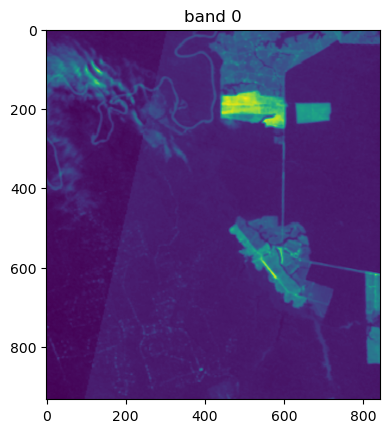

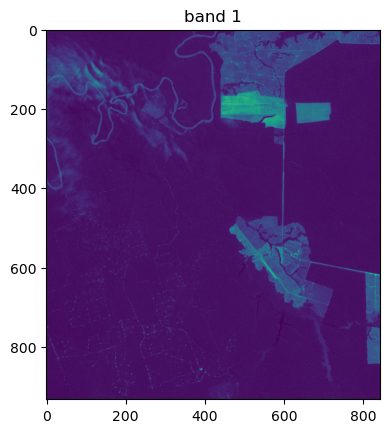

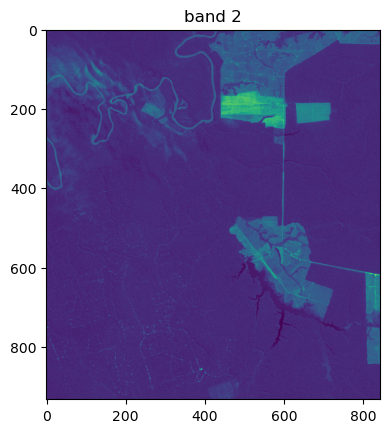

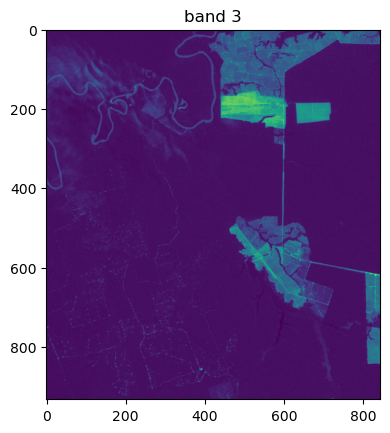

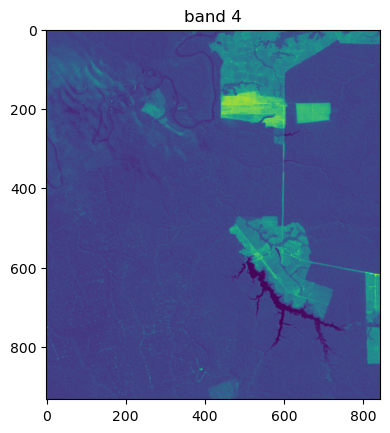

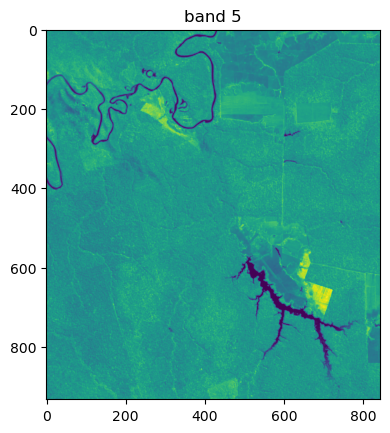

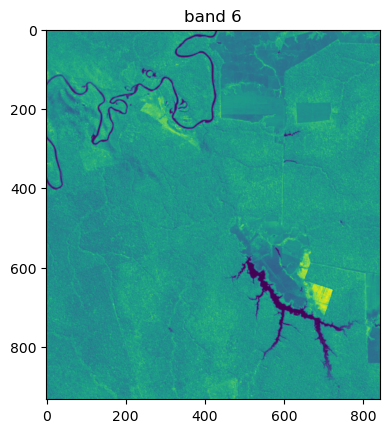

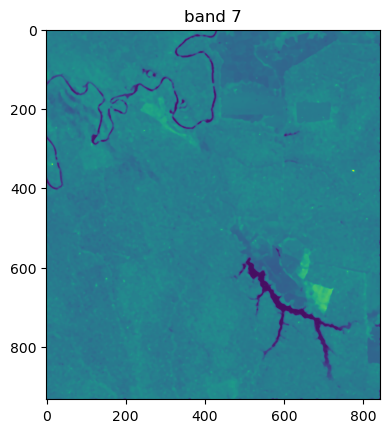

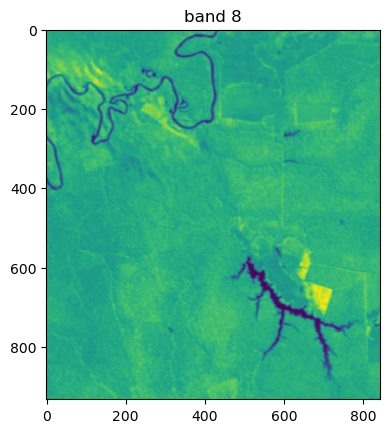

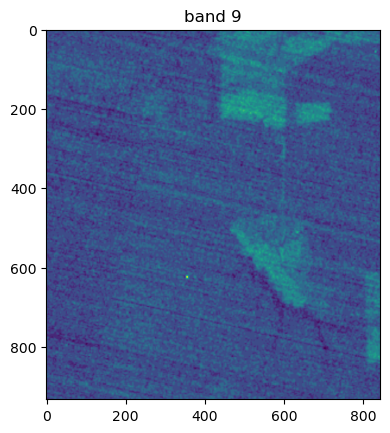

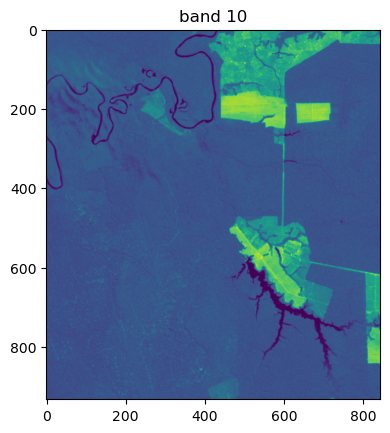

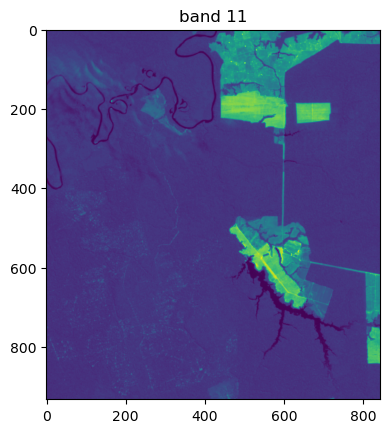

In [5]:
for i in range(nb_bands):
    im_tmpo=im[i,:,:]
    im[i,:,:]=(im_tmpo-np.min(im_tmpo))/(np.max(im_tmpo)-np.min(im_tmpo))
    plt.figure()
    plt.imshow(im[i,:,:])
    plt.title('band %d'%i)
    #plt.savefig('band_%.2d.png'%i)


Create a data matrix -> reshape data such as

Data is of dimensions (size_x x size_y , nb_bands)


In [8]:
data=np.zeros((size_x*size_y,nb_bands))
for i in range(nb_bands):
    data[:,i]=im[i,:,:].reshape(1,size_x*size_y)


Verify that data are correct

In [9]:
for i in range(nb_bands):
    print('band %.2d : min - max = [%.4f,%.4f]'%(i,np.min(data[:,i]),np.max(data[:,i])))


band 00 : min - max = [0.0000,1.0000]
band 01 : min - max = [0.0000,1.0000]
band 02 : min - max = [0.0000,1.0000]
band 03 : min - max = [0.0000,1.0000]
band 04 : min - max = [0.0000,1.0000]
band 05 : min - max = [0.0000,1.0000]
band 06 : min - max = [0.0000,1.0000]
band 07 : min - max = [0.0000,1.0000]
band 08 : min - max = [0.0000,1.0000]
band 09 : min - max = [0.0000,1.0000]
band 10 : min - max = [0.0000,1.0000]
band 11 : min - max = [0.0000,1.0000]


copy / paste your previous kmeans function

In [13]:
def kmeans(data,k=3,name_output=None,iter_max=100):
    # Number of points
    n = data.shape[0]
    # Number of features
    c = data.shape[1]

    # Generate random centers inside the dataset
    mean = np.mean(data, axis = 0)
    std = np.std(data, axis = 0)
    centers = np.random.randn(k,c)*std + mean

    # Plot the data and the centers generated as random
    # Plot the data and the centers generated as random
    if name_output is not None:
        plt.clf()
        plt.scatter(data[:,0], data[:,1], s=7)
        plt.scatter(centers[:,0], centers[:,1], marker='*', c='g', s=150)
        plt.title('initial centers')
        plt.savefig('%s_initial_centers.png'%name_output)

    # Internal variables
    centers_old = np.zeros(centers.shape) # to store old centers
    centers_new = deepcopy(centers) # Store new centers
    error = np.linalg.norm(centers_new - centers_old)
    iter = 0

    # clusters : array of size n with corresponding clusters
    clusters = np.zeros(n)
    # distances : nx4 matrix with distances to each center
    distances = np.zeros((n,k))

    # When, after an update, the estimate of that center stays the same, exit loop
    while error != 0 or iter==iter_max:
        # Measure the distance to every center (see np.linalg.norm)
        for i in range(k):
            distances[:,i] = np.linalg.norm(data - centers_new[i], axis=1)
        # Assign all training data to closest center (see np.argmin)
        clusters = np.argmin(distances, axis = 1)
        # save old centers
        centers_old = deepcopy(centers_new)
        # Calculate mean for every cluster and update the center
        for i in range(k):
            centers_new[i] = np.mean(data[clusters == i], axis=0)
        # compute and print error
        error = np.linalg.norm(centers_new - centers_old)
        print('iteration %d : error %.5f'%(iter,error))
        if np.isnan(error):
            print('nan : reset centers')
            centers_old = np.zeros(centers.shape)
            centers_new = np.random.randn(k,c)*std + mean

        iter+=1
    print('convergence after %d iterations'%iter)
    # plot
    if name_output is not None:
        plt.clf()
        plt.scatter(data[:,0], data[:,1], s=7)
        for i in range(k):
            plt.scatter(data[clusters==i,0], data[clusters==i,1], s=7+i*10)
        plt.scatter(centers_new[:,0], centers_new[:,1], marker='*', c='g', s=150)
        plt.title('clustering')
        #plt.savefig('%s_result_with_%d_clusters.png'%(name_output,k))
    return clusters


Perform k-means

In [14]:
clusters = kmeans(data,k=4)

iteration 0 : error 1.19150
iteration 1 : error 0.50571
iteration 2 : error 0.19783
iteration 3 : error 0.11337
iteration 4 : error 0.05465
iteration 5 : error 0.02307
iteration 6 : error 0.01336
iteration 7 : error 0.01085
iteration 8 : error 0.01069
iteration 9 : error 0.01035
iteration 10 : error 0.01059
iteration 11 : error 0.00983
iteration 12 : error 0.00952
iteration 13 : error 0.00925
iteration 14 : error 0.00895
iteration 15 : error 0.00955
iteration 16 : error 0.01027
iteration 17 : error 0.01149
iteration 18 : error 0.01249
iteration 19 : error 0.01457
iteration 20 : error 0.01758
iteration 21 : error 0.02197
iteration 22 : error 0.02605
iteration 23 : error 0.03016
iteration 24 : error 0.03483
iteration 25 : error 0.03869
iteration 26 : error 0.03826
iteration 27 : error 0.03386
iteration 28 : error 0.03061
iteration 29 : error 0.02921
iteration 30 : error 0.03013
iteration 31 : error 0.03320
iteration 32 : error 0.03490
iteration 33 : error 0.03160
iteration 34 : error 0.0

Rescale clustering

In [15]:
im_clusters=clusters.reshape((size_x,size_y))

Plot the clustering

Text(0.5, 1.0, 'result_clustering')

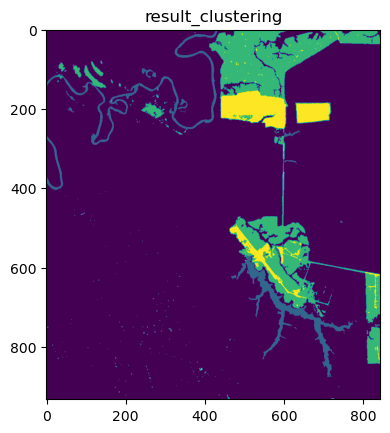

In [16]:
plt.clf()
plt.imshow(im_clusters)
plt.title('result_clustering')
#plt.savefig('clustering_sentinel.png')